# Player Teams Dataset Statistics

## Section: Import Data
This section focuses on import libraries and players_teams dataset.
The process involves:
- import pandas and matplotlib.pyplot libraries
- import players_teams dataset

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../basketballPlayoffs/players_teams.csv', delimiter=",")

## Section: Explore Dataset
This section focuses on explore the dataset.
The process involves:
- Find null values
- Calcule statistical data like percentile, mean and std of the numerical values 

In [10]:
## finding null values
data.isnull().sum()

playerID              0
year                  0
stint                 0
tmID                  0
lgID                  0
GP                    0
GS                    0
minutes               0
points                0
oRebounds             0
dRebounds             0
rebounds              0
assists               0
steals                0
blocks                0
turnovers             0
PF                    0
fgAttempted           0
fgMade                0
ftAttempted           0
ftMade                0
threeAttempted        0
threeMade             0
dq                    0
PostGP                0
PostGS                0
PostMinutes           0
PostPoints            0
PostoRebounds         0
PostdRebounds         0
PostRebounds          0
PostAssists           0
PostSteals            0
PostBlocks            0
PostTurnovers         0
PostPF                0
PostfgAttempted       0
PostfgMade            0
PostftAttempted       0
PostftMade            0
PostthreeAttempted    0
PostthreeMade   

In [11]:
# summary statistics
data.describe()

,year,stint,GP,GS,minutes,points,oRebounds,dRebounds,rebounds,assists,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ
count,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,...,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000
mean,5.326226,0.113539,24.320896,12.438166,501.269190,176.261727,24.388060,54.334755,78.722814,39.031983,...,0.759062,2.623134,3.735075,12.282516,5.149254,3.672708,2.822495,2.924307,1.019723,0.026652
std,2.905475,0.422574,10.460614,13.641697,359.566117,161.983839,23.325974,48.347088,69.210226,40.147037,...,2.280011,5.037807,6.697874,24.313379,10.726421,8.463917,6.723170,7.751034,2.992637,0.170751
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,17.000000,0.000000,165.000000,41.000000,6.000000,15.000000,21.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,29.000000,5.000000,459.000000,129.000000,18.000000,42.000000,63.000000,26.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,0.000000,32.000000,29.000000,826.250000,284.000000,36.000000,83.000000,119.000000,57.250000,...,0.000000,3.000000,5.000000,15.000000,6.000000,4.000000,2.000000,1.000000,0.000000,0.000000
max,10.000000,3.000000,34.000000,34.000000,1234.000000,860.000000,162.000000,276.000000,363.000000,236.000000,...,31.000000,34.000000,43.000000,188.000000,82.000000,68.000000,62.000000,85.000000,32.000000,2.000000


## Section: Statistics
This section focuses on extraction of important statistics to analyse the dataset.
The process involves:
- Make a graphic of the teams with most points
- Make a graphic of the teams with most post season games played
- Make a graphic of the teams with most rebounds

### Graphic Teams with the Most Points

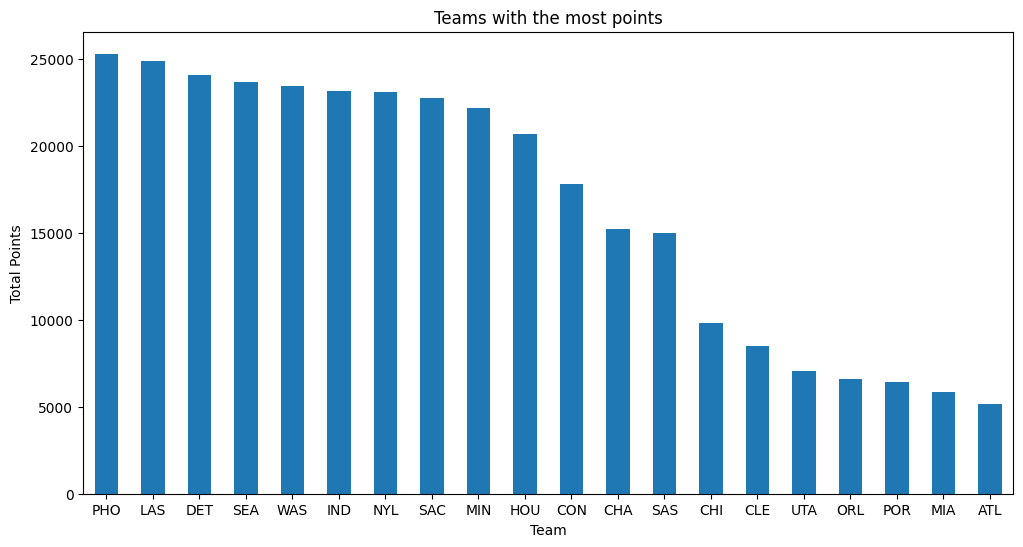

In [12]:
team_points = data.groupby('tmID')['points'].sum()
team_points = team_points.sort_values(ascending=False)

plt.figure(figsize=(12,6))
team_points.plot(kind='bar')
plt.xlabel('Team')
plt.ylabel('Total Points')
plt.title('Teams with the most points')
plt.xticks(rotation=0)
plt.show()


### Graphic Teams with the Most Post Games Played

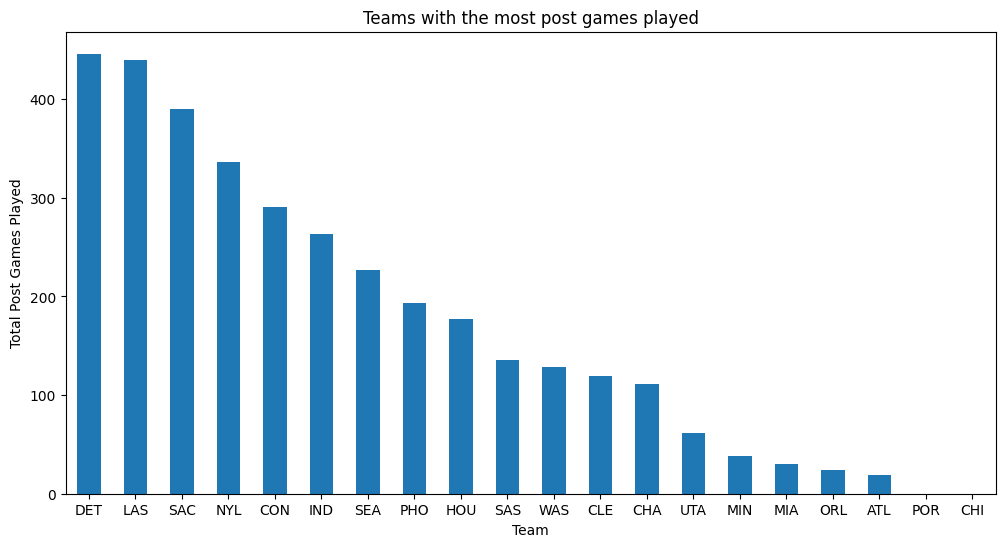

In [13]:
team_postGP = data.groupby('tmID')['PostGP'].sum()
team_postGP = team_postGP.sort_values(ascending=False)

plt.figure(figsize=(12,6))
team_postGP.plot(kind='bar')
plt.xlabel('Team')
plt.ylabel('Total Post Games Played')
plt.title('Teams with the most post games played')
plt.xticks(rotation=0)
plt.show()

### Graphic Teams with the Most Rebounds

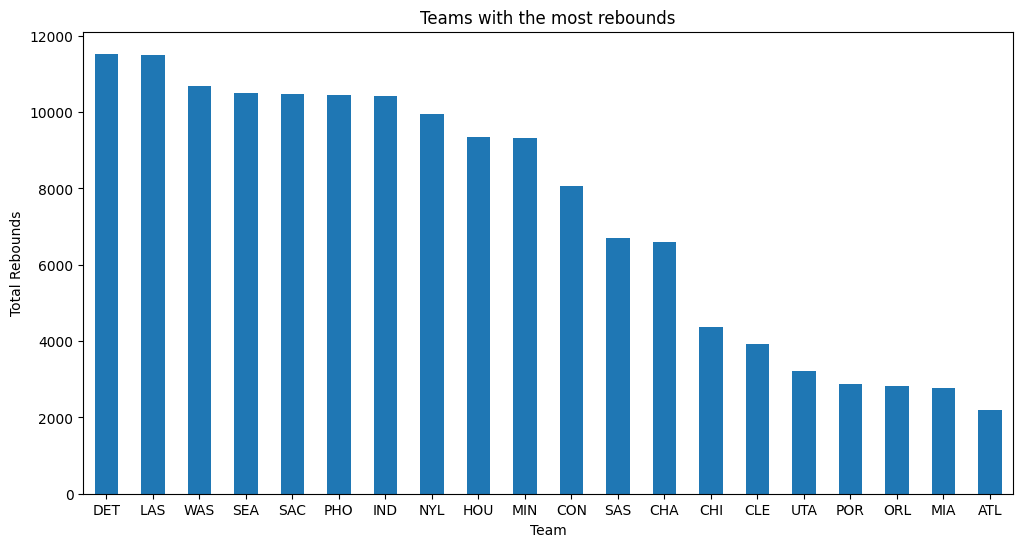

In [14]:
team_rebounds = data.groupby('tmID')['rebounds'].sum()
team_rebounds = team_rebounds.sort_values(ascending=False)

plt.figure(figsize=(12,6))
team_rebounds.plot(kind='bar')
plt.xlabel('Team')
plt.ylabel('Total Rebounds')
plt.title('Teams with the most rebounds')
plt.xticks(rotation=0)
plt.show()

## Section: Correlation Analysis
This section focuses on analyse correlation between data on the dataset.
The process involves:
- Group stats by team
- Make a correlation matrix

In [15]:
grouped_data = data.groupby('tmID')
grouped_data.head()
team_stats = grouped_data.agg({
    'GP': 'sum',
    'GS': 'sum',
    'minutes': 'sum',
    'points': 'sum',
    'oRebounds': 'sum',
    'dRebounds': 'sum',
    'rebounds': 'sum',
    'assists': 'sum',
    'steals': 'sum',
    'blocks': 'sum',
    'turnovers': 'sum',
    'PF': 'sum',
    'fgAttempted': 'sum',
    'fgMade': 'sum',
    'ftAttempted': 'sum',
    'ftMade': 'sum',
    'threeAttempted': 'sum',
    'threeMade': 'sum',
    'dq': 'sum',
    'PostGP': 'sum'
})

team_stats

,GP,GS,minutes,points,oRebounds,dRebounds,rebounds,assists,steals,blocks,turnovers,PF,fgAttempted,fgMade,ftAttempted,ftMade,threeAttempted,threeMade,dq,PostGP
tmID,,,,,,,,,,,,,,,,,,,,
ATL,670,336,13315,5175,701,1505,2206,1029,611,236,1066,1446,4542,1907,1392,1045,972,316,12,19
CHA,2258,1160,46509,15238,2143,4462,6605,3438,1755,811,3287,4704,13099,5460,4309,3194,3151,1124,44,111
CHI,1357,675,27324,9832,1390,2989,4379,2183,1052,520,1954,2531,8645,3589,2849,2015,1890,639,15,0
CLE,1253,650,26300,8489,1272,2659,3931,2039,973,343,1850,2385,7393,3147,2271,1692,1541,503,20,119
CON,2347,1189,47779,17808,2352,5712,8064,4116,1780,872,3196,4334,15316,6540,4588,3480,3777,1248,21,291
DET,3279,1658,67178,24085,3722,7807,11529,5340,2439,1207,5249,6752,20896,8791,7283,5296,3580,1207,55,446
HOU,2797,1494,59809,20679,2747,6613,9360,4360,2321,961,4259,5076,17620,7555,5697,4403,3481,1166,30,177
IND,3264,1670,67575,23162,3328,7084,10412,5032,3036,1205,4865,6447,20167,8249,6173,4810,5455,1854,63,263
LAS,3226,1670,67727,24869,3413,8071,11484,5893,2586,1518,5007,6842,21252,9168,6582,5000,4562,1533,85,440


                      GP        GS   minutes    points  oRebounds  dRebounds   
GP              1.000000  0.998506  0.998975  0.996183   0.979788   0.990367  \
GS              0.998506  1.000000  0.999756  0.995476   0.975854   0.991925   
minutes         0.998975  0.999756  1.000000  0.995918   0.976858   0.992067   
points          0.996183  0.995476  0.995918  1.000000   0.976869   0.995793   
oRebounds       0.979788  0.975854  0.976858  0.976869   1.000000   0.976083   
dRebounds       0.990367  0.991925  0.992067  0.995793   0.976083   1.000000   
rebounds        0.992182  0.992059  0.992466  0.995068   0.988437   0.997761   
assists         0.991186  0.990924  0.991307  0.996117   0.974992   0.995296   
steals          0.984451  0.984429  0.984798  0.978421   0.973595   0.967959   
blocks          0.963306  0.962074  0.963657  0.974385   0.950080   0.971178   
turnovers       0.995717  0.994695  0.995763  0.992586   0.979525   0.990158   
PF              0.993926  0.990394  0.99

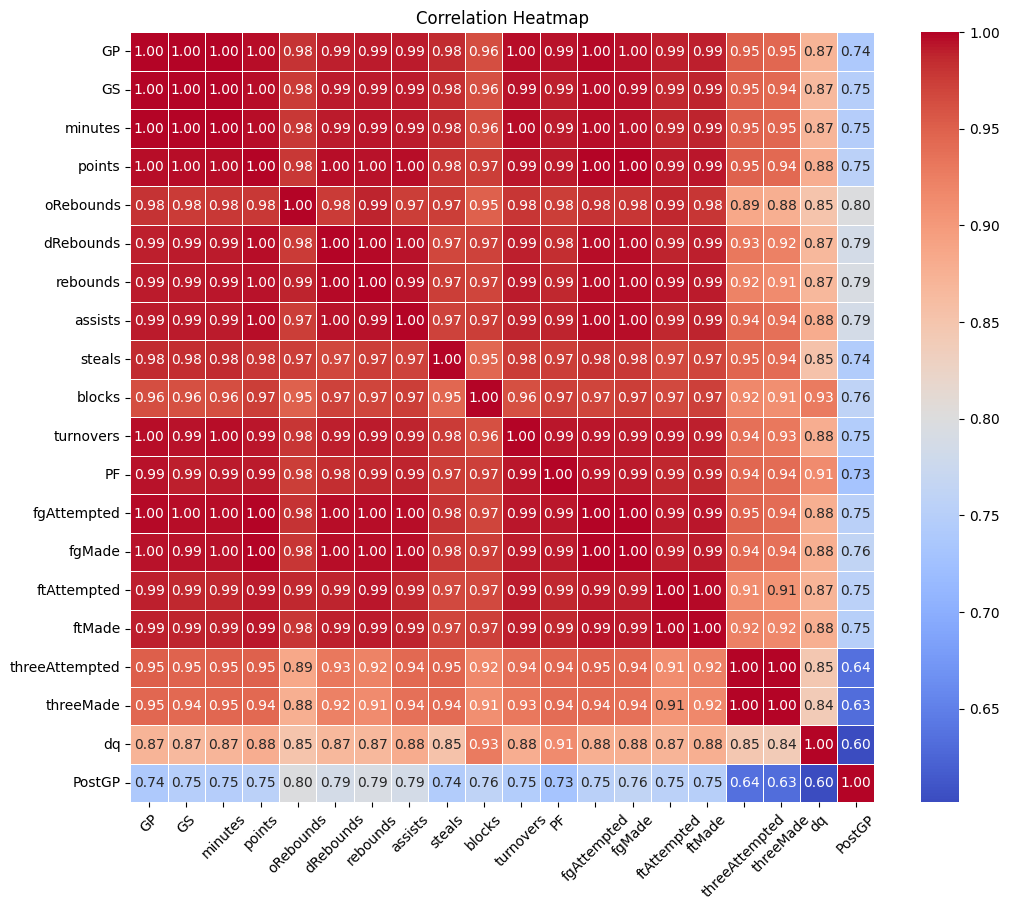

In [16]:
# Calculate the correlation between points, rebounds, and another statistic
correlation = team_stats[["GP","GS","minutes","points","oRebounds","dRebounds","rebounds","assists","steals","blocks","turnovers","PF","fgAttempted","fgMade","ftAttempted","ftMade","threeAttempted","threeMade","dq","PostGP"]].corr()

print(correlation)

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Customize heatmap appearance (optional)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()